# Movie Insights for Microsoft.


## Introduction

Microsoft wants in on creating original video content. They need to find out what kind of movies are doing the best at the box office and further insights on how they can translate that into their business.

## Objectives

1. Identifying the most popular movie genres.
2. Identifying the top rated movie genres.
2. Identifying the top rated movie titles.
3. Identifying the principals and crews associated with the top rated movies
4. Identifying the budgets for the top rated movies.



## Requirements
**1. Load the data using Pandas**

We will create the dataframes to represent our CSV files.

**2. Data Cleaning**

For each objective we will perform data cleaning on the dataframes.

Identifying and handling; missing values, erroneus values and duplicates.

**3. Data Aggregation**

Again for each objective we will combine the necessary dataframes.

**4. Conclusion**

We will generate conclusions from our visualizations.

## Importing Libraries
First step, we import the libraries we will use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



## Loading Data 
Here we access the data and load the data using pandas.

In [237]:
# Reading csv files using pandas
movie_gross = pd.read_csv("bom.movie_gross.csv")
title_basics = pd.read_csv("title.basics.csv")
title_ratings = pd.read_csv("title.ratings.csv")
name_basics = pd.read_csv("name.basics.csv")
tmbd_movies = pd.read_csv("tmdb.movies.csv")
movie_budgets = pd.read_csv("tn.movie_budgets.csv")
title_principals = pd.read_csv("title.principals.csv")
crew = pd.read_csv("title.crew.csv")
akas = pd.read_csv("title.akas.csv")




In [3]:
#Reading data from tsv files by passing the tsv file to a read_csv() function and including the tab separator.
movie_info = pd.read_csv("rt.movie_info.tsv", sep='\t')
# Reading this data without encoding as latin 1 brings up an error meaning there are some special characters within the data. 
reviews = pd.read_csv("rt.reviews.tsv", sep='\t', encoding='latin-1')

To get an idea of what our data looks like we will use methods some methods .head(), .info()

In [4]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
title_basics['genres']


0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [6]:
title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [7]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
name_basics.head()


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [9]:
tmbd_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [12]:
crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [13]:
akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [14]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [15]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Now we have loaded various datasets . We also have a basic idea of what our data looks like.

## Which are the most popular genres?
To identify this we need the title_basics and title_ratings dataframes. We need to combine the two dataframes and then clean it further. To combine the dataframes they need to share the index column so we need to set the same index column in both.

 We will start by cleaning the title basics dataframe. The original_title column, runtime_minutes and genre columns conatin missing values.

In [23]:
#Using .info() to get a better understanding of the data.
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [24]:
#Replacing the null values in the three columns using .fillna()method
title_basics['original_title'].fillna('Unknown', inplace= True)
title_basics['runtime_minutes'].fillna('0', inplace= True)
title_basics['genres'].fillna('Unknown', inplace= True)

In [25]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   tconst           146144 non-null  object
 1   primary_title    146144 non-null  object
 2   original_title   146144 non-null  object
 3   start_year       146144 non-null  int64 
 4   runtime_minutes  146144 non-null  object
 5   genres           146144 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.7+ MB


In [238]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Since the dataframes are both clean we can proceed to join them.

In [28]:
# Setting the same index column for both dataframes using the .set_index() method
title_ratings.set_index('tconst', inplace = True)
title_basics.set_index('tconst', inplace = True)

In [29]:
# Combining the dataframes using the .join() method to form one dataframe that will name basics_and_ratings.
basics_and_ratings = title_basics.join(title_ratings)
basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146144 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  146144 non-null  object 
 4   genres           146144 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.9+ MB


In [30]:
basics_and_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,119.0


Now we have a joined dataframe with the details of the movies, their ratings and votes. We need to clean the dataframe further.
The rating is quite important to rank the genres therefore for we will drop the rows with no values in 'averagerating' and 'numvotes' columns.
We also need to check for any duplicates and delete them.

In [31]:
#Check for duplicates
basics_and_ratings.duplicated().value_counts()

False    146046
True         98
dtype: int64

There are 98 duplicates present in our joined dataset which we need to drop.

In [32]:
#Using the .drop_duplicates() to drop all duplicate rows.
basics_and_ratings.drop_duplicates(inplace = True)

In [33]:
#dropping all rows with null values in the 'averagerating' and 'numvotes' columns.
basics_and_ratings.dropna(inplace=True)


In [34]:
basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  73856 non-null  object 
 4   genres           73856 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.5+ MB


Now that our joined dataframe is cleaned we can proceed to see the relationship between genres and average rating. This will give us an idea of which genres have the highest ratings and which have the lowest ratings.

In [35]:
#Sorting the dataset by 'averagerating' and 'numvotes' using.sort_values()method.
basics_and_ratings.sort_values(by=['averagerating', 'numvotes'], ascending=False, inplace=True)
basics_and_ratings.head(100)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt9715646,Renegade,Renegade,2019,0,Documentary,10.0,20.0
tt4960818,Revolution Food,Revolution Food,2015,70,Documentary,10.0,8.0
tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65,Documentary,10.0,7.0
tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31,Documentary,10.0,6.0
tt5344358,All Around Us,All Around Us,2019,0,Documentary,10.0,6.0
...,...,...,...,...,...,...,...
tt7738784,Peranbu,Peranbu,2018,147,Drama,9.4,9629.0
tt10084190,Chandigarh amritsar chandigarh,Chandigarh amritsar chandigarh,2019,107,"Comedy,Drama,Romance",9.4,952.0
tt5624252,That Vitamin Movie,That Vitamin Movie,2016,86,Documentary,9.4,927.0


It will be important to also identify the most popular genres.

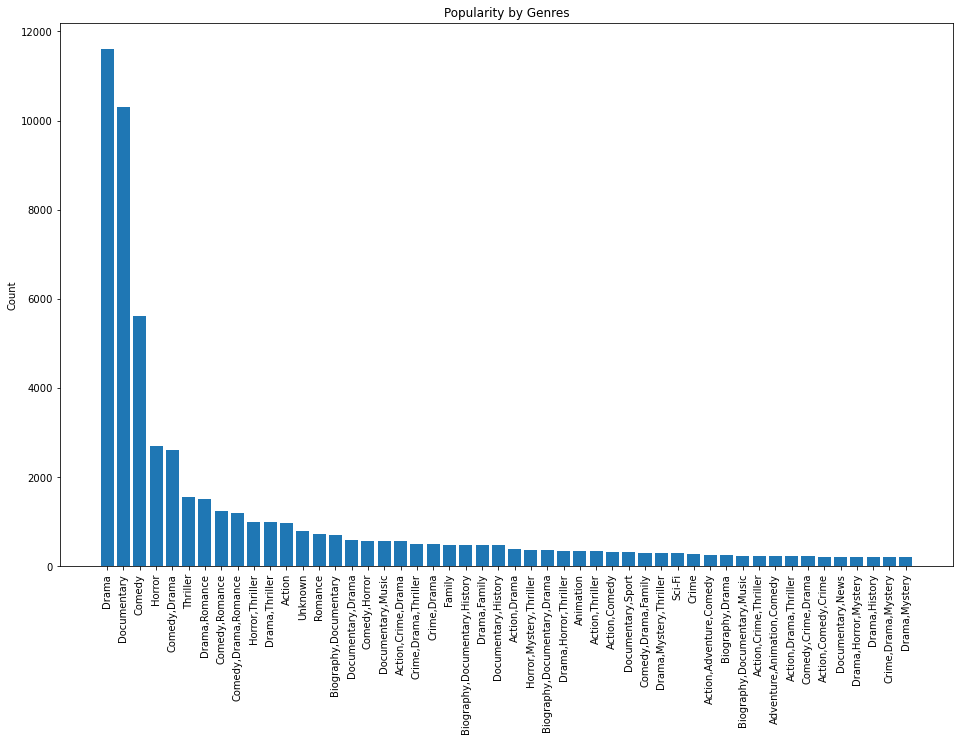

In [36]:
#Creating the variables
genres_counts = basics_and_ratings['genres'].value_counts()
top_50_genres = genres_counts.iloc[:50]

#Creating the plot
fig, ax = plt.subplots(figsize=(16,10))

#Graphing 'genres' vs 'averagerating'
#ax1.bar(genres_counts.index, genres_counts.values)
ax.bar(top_50_genres.index, top_50_genres.values)
#Labelling the graph
#ax1.tick_params(axis="x", labelrotation=90)
ax.tick_params(axis="x", labelrotation=90)
#ax1.set_ylabel("Count")
ax.set_ylabel("Count")
#ax1.set_title('Genres Counts')
ax.set_title('Popularity by Genres');

The graph shows the top 20 most popular genres, clearly, the most popular genre is drama, followed by Documentary and comedy.
A good number of movies have mixed genre with comedy and drama combination in the lead.

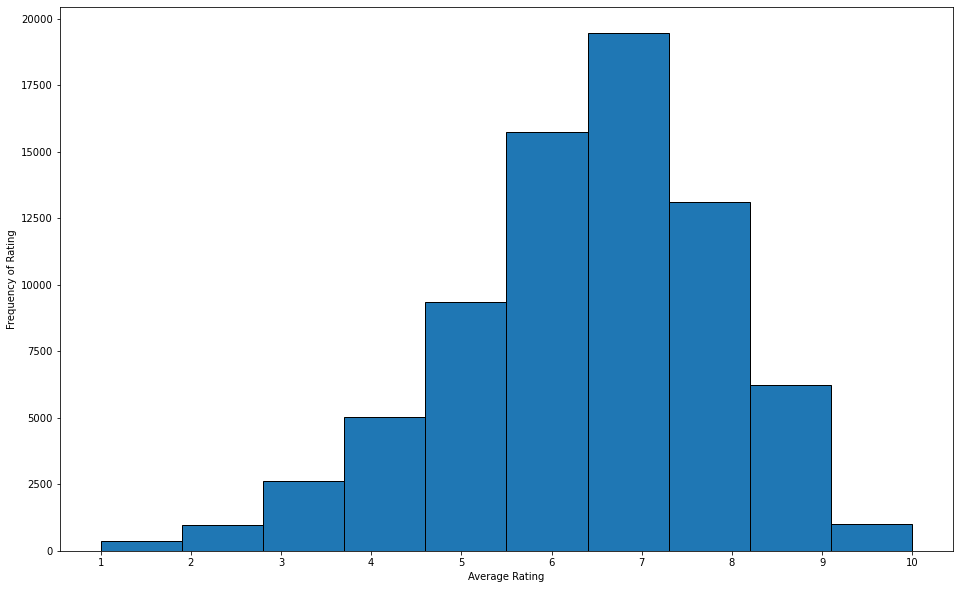

In [40]:
#Create the variable
x = basics_and_ratings['averagerating']

#Create the plot
fig, ax = plt.subplots(figsize=(16,10))

#Plot the figure
xticks = np.linspace(start=min(x), stop=max(x), num=10)
ax.hist(x,edgecolor="black")
ax.set_xticks(xticks)
ax.set_xlabel("Average Rating")
ax.set_ylabel("Frequency of Rating");

The most popular ratings fall between 6 and 8. This gives more insight if we were looking for movies with ratings of 7 and above and a confidence that we are on the right track.

In [193]:
question_1_df['averagerating'].value_counts()

7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64

## Which movie titles had the highest ratings? 

In [194]:
#Create a copy of the dataframe
question_1_df = basics_and_ratings.copy()
question_1_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt9715646,Renegade,Renegade,2019,0,Documentary,10.0,20.0
tt4960818,Revolution Food,Revolution Food,2015,70,Documentary,10.0,8.0
tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65,Documentary,10.0,7.0
tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31,Documentary,10.0,6.0
tt5344358,All Around Us,All Around Us,2019,0,Documentary,10.0,6.0


For this question we will need to use the following dataframes: title_principals, crew and names_basics.

In [46]:
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [47]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [48]:
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [49]:
crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


### Data Aggregation and Cleaning

We need to get a better understanding of our data so that we may know what to clean.

In [50]:
title_principals.set_index('tconst', inplace=True)

In [51]:
crew.set_index('tconst', inplace=True)

In [52]:
principals_and_crew = title_principals.join(crew)
principals_and_crew

,ordering,nconst,category,job,characters,directors,writers
tconst,,,,,,,
tt0063540,10,nm0006210,composer,NaN,NaN,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,1,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,2,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,3,nm0756379,actor,NaN,"[""Ganeshi N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,4,nm0474876,actor,NaN,"[""Dwarka N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
...,...,...,...,...,...,...,...
tt9916754,5,nm9272490,director,supervising director,NaN,"nm9272490,nm8349149","nm8349149,nm9272490"
tt9916754,6,nm8349149,director,co-director,NaN,"nm9272490,nm8349149","nm8349149,nm9272490"
tt9916754,7,nm9272489,cinematographer,NaN,NaN,"nm9272490,nm8349149","nm8349149,nm9272490"


In [53]:
principals_and_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0063540 to tt9916754
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
 5   directors   1014519 non-null  object
 6   writers     860998 non-null   object
dtypes: int64(1), object(6)
memory usage: 62.8+ MB


As we can see, a good number of columns have null values. We will create a copy of the joined dataframe to work with called, question_2_df.

In [54]:
question_2_df = principals_and_crew.copy()

In [55]:
#Check for duplicates
question_2_df.duplicated().value_counts()

False    1005341
True       22845
dtype: int64

In [56]:
#Drop duplicates
question_2_df.drop_duplicates(inplace=True)
question_2_df.duplicated().value_counts()

False    1005341
dtype: int64

For the job column, more than half of the data contains null values, we can drop this column since the category column provides more or less the same information and it has no null values.

In [57]:
#Number of null values
question_2_df['job'].isna().value_counts()

True     831151
False    174190
Name: job, dtype: int64

In [58]:
#Details of category column
question_2_df['category'].unique()

array(['composer', 'actor', 'actress', 'director', 'writer',
       'cinematographer', 'editor', 'producer', 'production_designer',
       'self', 'archive_footage', 'archive_sound'], dtype=object)

In [59]:
#Dropping the job column
question_2_df.drop(['job'], axis=1, inplace=True)


In [60]:
question_2_df

,ordering,nconst,category,characters,directors,writers
tconst,,,,,,
tt0063540,10,nm0006210,composer,NaN,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,1,nm0474801,actor,"[""Kundan S. Prasad"",""Bajrangi""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,2,nm0904537,actress,"[""Munni"",""Laila-E-Aasmaan""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,3,nm0756379,actor,"[""Ganeshi N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,4,nm0474876,actor,"[""Dwarka N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
...,...,...,...,...,...,...
tt9916754,5,nm9272490,director,NaN,"nm9272490,nm8349149","nm8349149,nm9272490"
tt9916754,6,nm8349149,director,NaN,"nm9272490,nm8349149","nm8349149,nm9272490"
tt9916754,7,nm9272489,cinematographer,NaN,"nm9272490,nm8349149","nm8349149,nm9272490"


In [61]:
#Replacing the null values in the characters,directors and writers columns using .fillna()method
question_2_df['characters'].fillna('Unknown', inplace= True)
question_2_df['directors'].fillna('Unknown', inplace= True)
question_2_df['writers'].fillna('Unknown', inplace= True)

In [62]:
question_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005341 entries, tt0063540 to tt9916754
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1005341 non-null  int64 
 1   nconst      1005341 non-null  object
 2   category    1005341 non-null  object
 3   characters  1005341 non-null  object
 4   directors   1005341 non-null  object
 5   writers     1005341 non-null  object
dtypes: int64(1), object(5)
memory usage: 53.7+ MB


In [63]:
question_2_df.head()

,ordering,nconst,category,characters,directors,writers
tconst,,,,,,
tt0063540,10,nm0006210,composer,Unknown,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,1,nm0474801,actor,"[""Kundan S. Prasad"",""Bajrangi""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,2,nm0904537,actress,"[""Munni"",""Laila-E-Aasmaan""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,3,nm0756379,actor,"[""Ganeshi N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0063540,4,nm0474876,actor,"[""Dwarka N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"


Our data does not contain null values now we can proceed to join it with the name_basics dataframe to identify the actual names of the principals and crew. We will start by cleaning the 'name_basics' dataframe.

In [64]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


All columns have null values except the primary_name column. We need to fix that. For the numerical columns we will fill the null values with 0 and for the categorical columns we will fill the null values with 'Unknown'.

In [65]:
#Filling the null values
name_basics['primary_profession'].fillna('Unknown', inplace=True)
name_basics['known_for_titles'].fillna('Unknown', inplace=True)
name_basics['birth_year'].fillna('0', inplace=True)
name_basics['death_year'].fillna('0', inplace=True)

In [66]:
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,0,0,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,0,0,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,0,0,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,0,0,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,0,0,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


To join the two dataframes we set the common column 'nconst' as the index in each.

In [67]:
question_2_df.reset_index(inplace=True)

In [68]:
question_2_df.set_index('nconst', inplace=True)

In [69]:
name_basics.set_index('nconst', inplace=True)

In [70]:
name_basics

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,0,0,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,0,0,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,0,0,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,0,0,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,0,0,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...
nm9990381,Susan Grobes,0,0,actress,Unknown
nm9990690,Joo Yeon So,0,0,actress,"tt9090932,tt8737130"
nm9991320,Madeline Smith,0,0,actress,"tt8734436,tt9615610"


In [86]:
#Joining the two dataframes to create a dataframe name_details
name_details_df = question_2_df.join(name_basics)
name_details_df

,tconst,ordering,category,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,,,,,,,
nm0000002,tt0858500,2,actress,"[""May""]",nm0950000,nm1544301,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
nm0000002,tt1368858,1,actress,"[""Anne-Marie""]",nm2940732,"nm0209856,nm2940732",Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
nm0000002,tt1626811,4,self,"[""Herself - Interviewee""]",nm1862979,Unknown,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
nm0000002,tt2053352,4,archive_footage,"[""Herself""]","nm1367752,nm3088409,nm4662682","nm4662682,nm1367752,nm3088409",Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
nm0000003,tt1714820,3,archive_footage,"[""Herself""]",nm0759368,"nm0759368,nm2923352,nm0278392",Brigitte Bardot,1934,0,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
...,...,...,...,...,...,...,...,...,...,...,...
nm9993494,tt7722258,7,writer,Unknown,nm0788858,"nm0788858,nm7733703,nm9993494",Amjad Ali,0,0,writer,tt7722258
nm9993573,tt10299418,5,director,Unknown,nm9993573,nm9993573,Lakisha Louissaint,0,0,"director,writer,producer",tt10299418
nm9993616,tt4844148,4,actor,"[""Mick Owen""]",nm0537923,"nm7444537,nm0204030,nm0537923,nm0404072",Ryan Mac Lennan,0,0,actor,tt4844148


The 'name_details_df' dataframe contains the personal details(name, birth year, death year) of the principals and crew, their main profession and which movies they were involved in. We can use this data to tie the top movies with their directors and crew. We can do this by combining 'question_1_df' and the 'name_detail_df'.

In [87]:
name_details_df.reset_index(inplace=True)


In [88]:
name_details_df

,nconst,tconst,ordering,category,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0000002,tt0858500,2,actress,"[""May""]",nm0950000,nm1544301,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
1,nm0000002,tt1368858,1,actress,"[""Anne-Marie""]",nm2940732,"nm0209856,nm2940732",Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
2,nm0000002,tt1626811,4,self,"[""Herself - Interviewee""]",nm1862979,Unknown,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
3,nm0000002,tt2053352,4,archive_footage,"[""Herself""]","nm1367752,nm3088409,nm4662682","nm4662682,nm1367752,nm3088409",Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
4,nm0000003,tt1714820,3,archive_footage,"[""Herself""]",nm0759368,"nm0759368,nm2923352,nm0278392",Brigitte Bardot,1934,0,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
...,...,...,...,...,...,...,...,...,...,...,...,...
1005336,nm9993494,tt7722258,7,writer,Unknown,nm0788858,"nm0788858,nm7733703,nm9993494",Amjad Ali,0,0,writer,tt7722258
1005337,nm9993573,tt10299418,5,director,Unknown,nm9993573,nm9993573,Lakisha Louissaint,0,0,"director,writer,producer",tt10299418
1005338,nm9993616,tt4844148,4,actor,"[""Mick Owen""]",nm0537923,"nm7444537,nm0204030,nm0537923,nm0404072",Ryan Mac Lennan,0,0,actor,tt4844148
1005339,nm9993650,tt8739208,4,actor,"[""Guardian""]",nm0797736,nm0797736,Marcin Balcerak,0,0,actor,tt8739208


In [89]:
#Setting the index to 'tconst'
name_details_df.set_index('tconst',inplace=True)

In [90]:
name_details_df

,nconst,ordering,category,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
tconst,,,,,,,,,,,
tt0858500,nm0000002,2,actress,"[""May""]",nm0950000,nm1544301,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
tt1368858,nm0000002,1,actress,"[""Anne-Marie""]",nm2940732,"nm0209856,nm2940732",Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
tt1626811,nm0000002,4,self,"[""Herself - Interviewee""]",nm1862979,Unknown,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
tt2053352,nm0000002,4,archive_footage,"[""Herself""]","nm1367752,nm3088409,nm4662682","nm4662682,nm1367752,nm3088409",Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
tt1714820,nm0000003,3,archive_footage,"[""Herself""]",nm0759368,"nm0759368,nm2923352,nm0278392",Brigitte Bardot,1934,0,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
...,...,...,...,...,...,...,...,...,...,...,...
tt7722258,nm9993494,7,writer,Unknown,nm0788858,"nm0788858,nm7733703,nm9993494",Amjad Ali,0,0,writer,tt7722258
tt10299418,nm9993573,5,director,Unknown,nm9993573,nm9993573,Lakisha Louissaint,0,0,"director,writer,producer",tt10299418
tt4844148,nm9993616,4,actor,"[""Mick Owen""]",nm0537923,"nm7444537,nm0204030,nm0537923,nm0404072",Ryan Mac Lennan,0,0,actor,tt4844148


In [110]:
#Joining the 'name_details_df' and 'question_1_df'
movies_and_directors_df = question_1_df.join(name_details_df)
movies_and_directors_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,nconst,ordering,category,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
tconst,,,,,,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77.0,nm0006210,10.0,composer,Unknown,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",Naushad,1919,2006,"composer,soundtrack,music_department","tt0054910,tt0266765,tt0044392,tt0053999"
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77.0,nm0023551,6.0,writer,Unknown,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",Abrar Alvi,1927,2009,"writer,actor,director","tt0071811,tt0359496,tt0056436,tt0061046"
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77.0,nm0347899,8.0,writer,Unknown,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",Gulzar,1936,0,"music_department,writer,soundtrack","tt0091256,tt0178186,tt1010048,tt2176013"
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77.0,nm0474801,1.0,actor,"[""Kundan S. Prasad"",""Bajrangi""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",Dilip Kumar,1922,0,"actor,writer,director","tt0058287,tt0054910,tt0047990,tt0084667"
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7.0,77.0,nm0474876,4.0,actor,"[""Dwarka N. Prasad""]",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",Sanjeev Kumar,1938,1985,actor,"tt0148841,tt0215517,tt0073707,tt0178186"


Now we have a dataframe 'movies_and_directors_df' that contains all the movie details; title,genre, runtime, principals and crew responsible.

In [111]:
#Check for duplicates
movies_and_directors_df.duplicated().value_counts()

False    617848
dtype: int64

We can have a quick preview of our dataframe and check further for what we might have missed

In [112]:
for col in movies_and_directors_df.columns:
    print(col, '\n', movies_and_directors_df[col].value_counts(normalize=True).head(10), '\n\n')

primary_title 
 The Return    0.000144
Lucky         0.000136
Broken        0.000134
Homecoming    0.000128
Home          0.000128
Paradise      0.000123
Together      0.000120
Rage          0.000115
The Gift      0.000110
Solo          0.000107
Name: primary_title, dtype: float64 


original_title 
 Lucky         0.000136
Broken        0.000121
The Gift      0.000110
Solo          0.000107
Delirium      0.000105
The Return    0.000102
Homecoming    0.000095
Aurora        0.000094
Eden          0.000092
Dead End      0.000087
Name: original_title, dtype: float64 


start_year 
 2017    0.117586
2016    0.117278
2015    0.114544
2014    0.112468
2013    0.107462
2012    0.104417
2018    0.103143
2011    0.099749
2010    0.093067
2019    0.030286
Name: start_year, dtype: float64 


runtime_minutes 
 0        0.098269
90.0     0.066371
85.0     0.028378
80.0     0.028353
100.0    0.028191
95.0     0.027499
93.0     0.021988
88.0     0.020872
92.0     0.020321
94.0     0.019667
Name: runti

Looks like everything is alright. We can proceed to sort our data using the 'averagerating' and 'numvotes' columns.

In [113]:
#Sorting the dataframe by the 'averagerating' and 'numvotes'
movies_and_directors_df.sort_values(by=['averagerating', 'numvotes'], ascending=False, inplace=True)

In [114]:
movies_and_directors_df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,nconst,ordering,category,characters,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
tconst,,,,,,,,,,,,,,,,,,
tt9715646,Renegade,Renegade,2019,0,Documentary,10.0,20.0,nm0907504,3.0,self,"[""Herself""]",nm3388005,Unknown,Alice Walker,1944,0,"writer,producer,miscellaneous","tt1200263,tt0088939,tt8101954,tt0372268"
tt9715646,Renegade,Renegade,2019,0,Documentary,10.0,20.0,nm1079801,1.0,self,"[""Himself""]",nm3388005,Unknown,David Icke,1952,0,"actor,writer,producer","tt2250650,tt0499386,tt5835186,tt0410990"
tt9715646,Renegade,Renegade,2019,0,Documentary,10.0,20.0,nm3388005,4.0,director,Unknown,nm3388005,Unknown,Stephen Peek,0,0,"producer,camera_department,cinematographer","tt6400614,tt5541338,tt7207006,tt7825894"
tt9715646,Renegade,Renegade,2019,0,Documentary,10.0,20.0,nm3389177,5.0,producer,Unknown,nm3388005,Unknown,Maria Demeshkina Peek,0,0,"producer,director,editor","tt6393304,tt7207006,tt6400614,tt4534378"
tt9715646,Renegade,Renegade,2019,0,Documentary,10.0,20.0,nm7392892,2.0,self,"[""Himself""]",nm3388005,Unknown,Ivan Pernar,0,0,Unknown,"tt9715646,tt4733046"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64,Drama,1.0,5.0,nm9819344,9.0,editor,Unknown,nm5328929,"nm9854008,nm9854007",Matteo Cataldo,0,0,editor,"tt8446392,tt8376278,tt8690590,tt9466330"
tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64,Drama,1.0,5.0,nm9853997,1.0,actor,"[""Ivan Coletta""]",nm5328929,"nm9854008,nm9854007",Giuseppe di Giorgio,0,0,"actor,producer",Unknown
tt8446392,La Scelta Impossibile,La Scelta Impossibile,2018,64,Drama,1.0,5.0,nm9853998,4.0,actor,"[""Boss""]",nm5328929,"nm9854008,nm9854007",Enzo Stasino,0,0,actor,tt8446392


## Which were the top rated genres?
We need to identify the genres with based on their averagerating so we can do this by grouping using the genres and sorting by the mean of their averagerating.


In [138]:
genres_ratings = movies_and_directors_df.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
genres_ratings


genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Music,Mystery                 9.0
Game-Show                     9.0
                             ... 
Crime,Music                   2.4
Adventure,Crime,Romance       2.3
History,Sci-Fi,Thriller       2.3
Adult,Horror                  2.0
Comedy,Musical,Sport          1.4
Name: averagerating, Length: 924, dtype: float64

We can visualize the top rated genres using a bar graph.

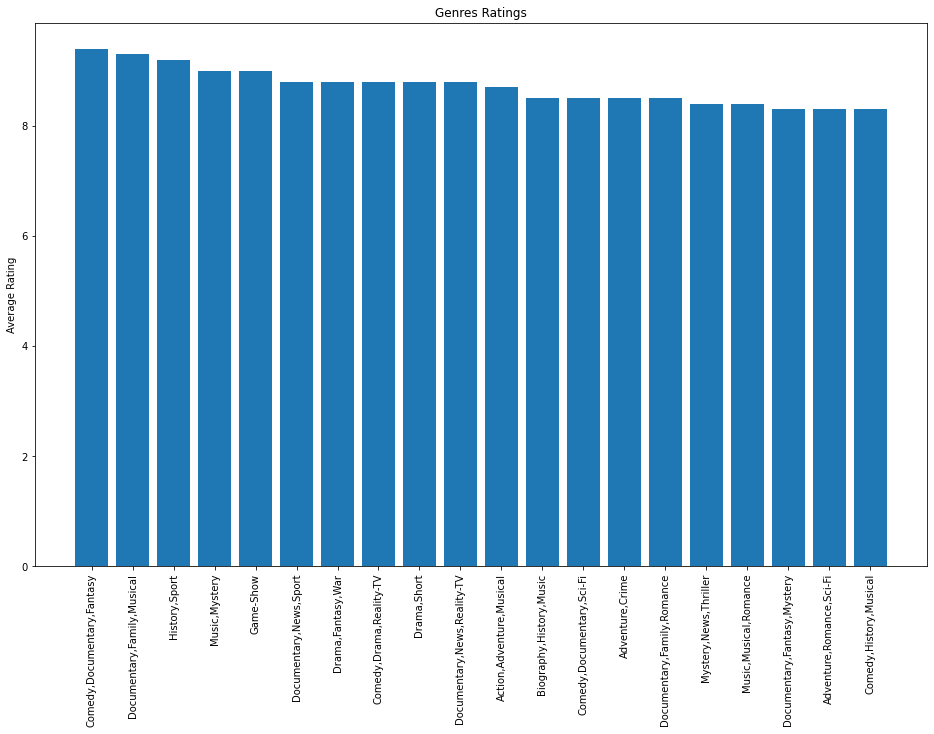

In [139]:
#Create variables
x = genres_ratings.index[:20]
y = genres_ratings.values[:20]

#Create plot
fig,ax = plt.subplots(figsize=(16,10))

#Graph genres vs their averagerating
ax.bar(x,y)

#Label graph
ax.set_title('Genres Ratings')
ax.set_ylabel('Average Rating')
ax.tick_params(axis="x", labelrotation=90)

## What are the top rated movie titles?

Next we can identify the movie titles based on their mean ratings.

In [198]:
#Use .groupby()
movie_title_ratings = movies_and_directors_df.groupby(['primary_title'])['averagerating'].mean().sort_values(ascending = False)
movie_title_ratings

primary_title
Pick It Up! - Ska in the '90s          10.0
I Was Born Yesterday!                  10.0
The Paternal Bond: Barbary Macaques    10.0
Revolution Food                        10.0
Calamity Kevin                         10.0
                                       ... 
Bye Bye Marrano                         1.0
Delusion of Persecution                 1.0
Transgender Trouble                     1.0
The Autobots                            1.0
Girls, Dance with the Dead              1.0
Name: averagerating, Length: 69993, dtype: float64

In [199]:
movie_title_ratings.sample(20, random_state=1)

primary_title
Lovely Molly                               5.3
Wid Winner and the Slipstream              8.0
Rosewater                                  6.6
Good Stripes                               7.1
Side Job.                                  5.8
El padre de mis hijos                      5.0
Idõugrók 3 - Lidércháborús Múlt            6.9
Sniper                                     5.5
Art/Crime                                  7.8
Asphalt                                    8.5
The Simulation Hypothesis                  8.2
PAY 2 PLAY: Democracy's High Stakes        8.4
7 rzeczy, których nie wiecie o facetach    4.8
Dad Made Dirty Movies                      6.6
My Geeky Nerdy Buddies                     4.6
Shambho Shankara                           3.6
Ek Haseena Thi Ek Deewana Tha              5.0
In the Deep of Winter                      8.9
Alzheimer's                                6.4
Hardin                                     7.0
Name: averagerating, dtype: float64

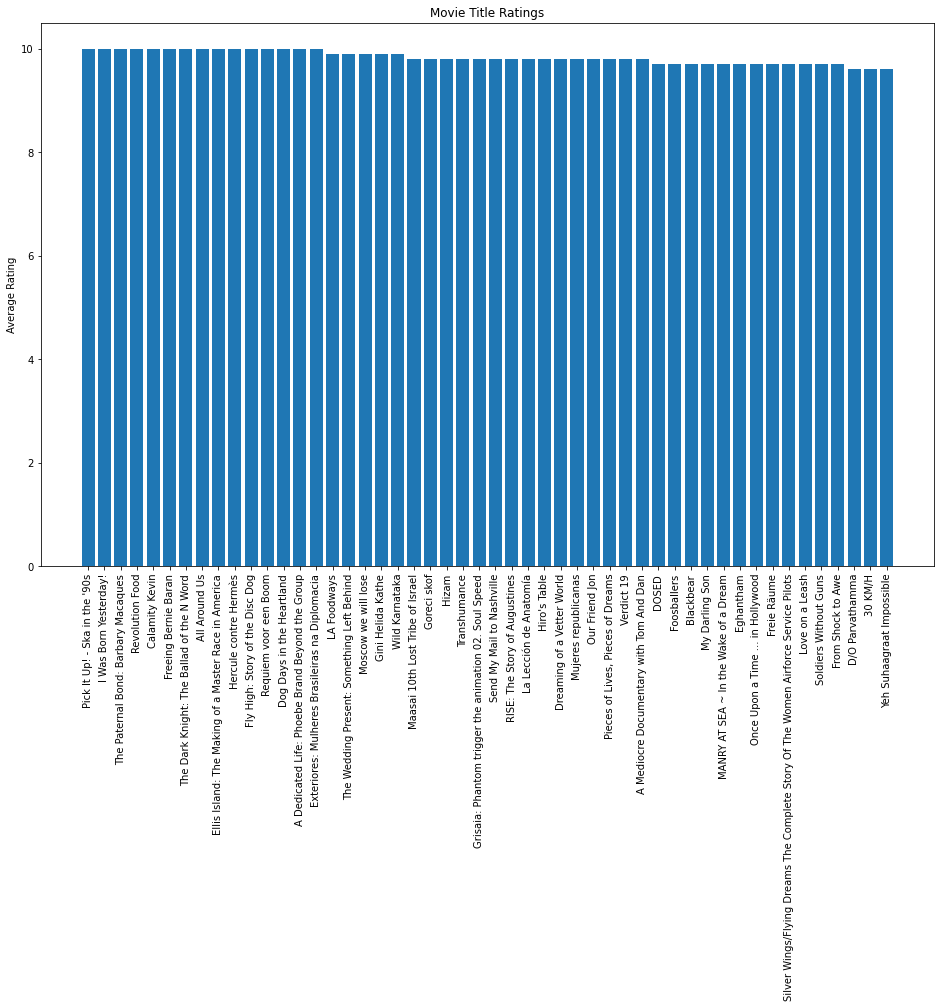

In [189]:
#Create variables
x = movie_title_ratings.index[:50]
y = movie_title_ratings.values[:50]

#Create plot
fig,ax = plt.subplots(figsize=(16,10))

#Graph genres vs their averagerating
ax.bar(x,y)

#Label graph
ax.set_title('Movie Title Ratings')
ax.set_ylabel('Average Rating')
ax.tick_params(axis="x", labelrotation=90)

From the bar graph we can see some of the top 50 movies with the highest average ratings. These are the movies we can borrow from in terms of details such as the run time and characters involved. 

## Who are the principals and crew associated with the top rated movies?
Next we can identify the crew associated with the highest ratings.

In [192]:
crew_ratings_df = movies_and_directors_df.groupby(['primary_name'])['averagerating'].mean().sort_values(ascending = False)
crew_ratings_df.sample(20, random_state=1)

primary_name
Günay Uysal          5.000000
Catalina Kang        5.700000
Steve Rucker         7.800000
Lukman Sardi         7.116667
Eva Maschke          7.300000
Woo-Jae Kim          6.900000
Anuvab Pal           5.250000
Diego Ruiz           5.925000
Fernando Barona      6.500000
Justin Livingston    8.200000
Justine Eister       5.700000
Graham Loy           8.800000
Andrew Holtzman      7.300000
Arun Chowdhury       7.300000
Rana Sarkar          6.933333
Noémie Baudet        7.100000
Leonardo Corbucci    7.400000
Bodie Hodge          5.800000
Debbie Garvey        7.600000
Aziz Chouaki         6.350000
Name: averagerating, dtype: float64

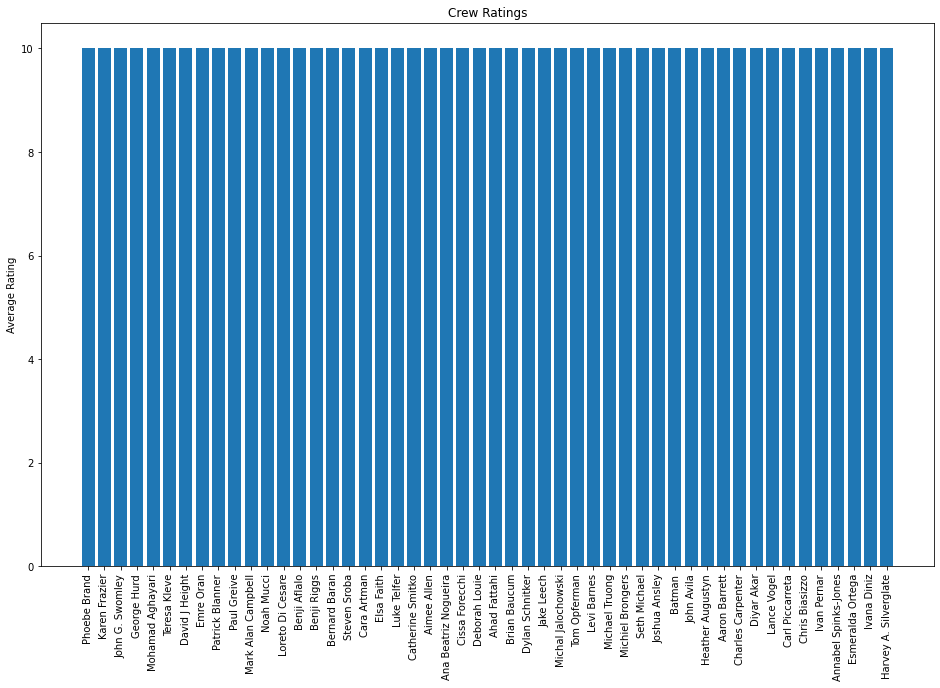

In [191]:
#Create variables
x = crew_ratings_df.index[:50]
y = crew_ratings_df.values[:50]

#Create plot
fig,ax = plt.subplots(figsize=(16,10))

#Graph genres vs their averagerating
ax.bar(x,y)

#Label graph
ax.set_title('Crew Ratings')
ax.set_ylabel('Average Rating')
ax.tick_params(axis="x", labelrotation=90)

We can see top 50 crew members associated with the highest ratings. These are probably the people you want to involve in the making of the movies based on their different roles.

## What was the budget for these movies?

### Data cleaning.
We need to clean the two dataframes associated with the budget and gross before we proceed.

In [212]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [240]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [213]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [239]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [241]:
#Using .fillna() method to replace the null values with None for the studio column.
movie_gross['studio'].fillna("None", inplace = True)
#Checking that are no null values in the column
movie_gross['studio'].isna().value_counts()

False    3387
Name: studio, dtype: int64

In [244]:
# Filling the remain null values in the numerical columns with 0.
movie_gross.fillna('0', inplace=True)

In [243]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3387 non-null   object
 2   domestic_gross  3387 non-null   object
 3   foreign_gross   3387 non-null   object
 4   year            3387 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 132.4+ KB


Our datafframes are now good to go, we can proceed to make further analysis.

Identifying the movies with the highest domestic and foreign gross and what was their production budget.

In [256]:
movie_budgets.sort_values(by=['domestic_gross', 'worldwide_gross'], ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
311,12,"Jul 4, 2008",AstÃ©rix aux Jeux Olympiques,"$113,500,000","$999,811","$132,999,811"
1605,6,"Feb 11, 2011",Gnomeo and Juliet,"$36,000,000","$99,967,670","$193,737,977"
642,43,"Aug 3, 2018",Christopher Robin,"$75,000,000","$99,215,042","$197,504,758"
4373,74,"Jun 4, 1999",Desert Blue,"$5,000,000","$99,147","$99,147"
707,8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000"
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0
5764,65,"Dec 31, 2007",Tin Can Man,"$12,000",$0,$0
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0


## Conclusion

We have successfully:
1. Identified the most popular movie genres.
2. Identified the top rated movie genres.
3. Identified the top rated movie titles.
4. Identified the principals and crews associated with the top rated movies


